Analysis of Data from Location-Based Social Networks (LBSN)
=====
*Michael Dorman*

*Geography and Environmental Development*, *BGU*

2022-03-29

-----

# Aim

* Location-Based Social Network (LBSN)
* Practical methods for processing and analysis
* Use in social sciences / geography research

# Requirements

Several Python packages need to be installed and loaded to run the code examples:

In [215]:
import glob                       # File paths
import pandas as pd               # Tables
import shapely.geometry           # Vector geometries
import geopandas as gpd           # Vector layers
import seaborn as sns             # Plots (Heatmap)
import networkx as nx             # Network analysis
import networkx.algorithms        # Network analysis (community detection)
import textblob                   # Sentiment analysis

In [216]:
import matplotlib.pyplot as plt
pd.options.display.max_rows = 6
pd.options.display.max_columns = 8
pd.options.display.max_colwidth = 35
plt.rcParams["figure.figsize"] = (18, 8)

In [217]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

We also need to set the working directory to the folder with the data:

* `*.json`—Boston tweets
* `borders.shp`—County borders (Shapefile)
* `network.csv`—Twitter follower edge list
* `locations.csv`—Twitter user locations

To reproduce the results, download the [data](data.zip) and the [notebook](notebook_01.ipynb).

# Contents

* Part I: Introduction
    * Location-Based Social Networks (LBSN)
    * Types of LBSN data
    * Twitter APIs
* Part II: Practical Examples
    * Example 1: Setting up Twitter API access
    * Example 2: Collecting tweets
    * Example 3: Analyzing spatial patterns
    * Example 4: Collecting network data
    * Example 5: Network analysis
    * Example 6: Sentiment analysis

# Part I: Introduction

## Location-Based Social Networks (LBSN)

* Social Networks where location information is part of the shared contents are called **Location Based Social Networks** (LBSN)
* LBSN provide new opportunities to study spatial dimensions of human behavior (Steiger *et al.*, 2015)

<figure>
    <img src="images/Lazer.svg" width="50%">
    <figcaption>Lazer et al. 2009, Science</figcaption>
</figure> 

<figure>
    <img src="images/5912385701_470d2b97ac_b.jpg" width="50%">
    <figcaption>Density of Twitter (blue) and Flickr (red) data in the US (<a href="https://www.flickr.com/photos/walkingsf/5912385701">https://www.flickr.com/photos/walkingsf/5912385701</a>)</figcaption>
</figure>

## Types of LBSN data

* Spatial information   
    * **Point** – Spatial location of LBSN posts
    * **Path** – Chronologically ordered locations from posts of a given user at different times
* Non-spatial information
    * **User identity** – The division of LBSN data among distinct users (as opposed to disregarding contributor identity)
    * **Text** – Textual components of the post (e.g., Twitter message text or Flickr image textual tags)
    * **Time** – The time-stamp of each post
    * **Network** – The social relations graph (i.e., presence of friends/followers relations between each pair of users)
    * **Image** – Images associated with LBSN posts
    * **Video** – Videos associated with LBSN posts

<figure>
    <img src="images/Onella2011.png" width="60%">
    <figcaption>Two points of view on LBSN data: (A) network structure and (B) geographical structure (Onella et al. 2011)</figcaption>
</figure>

## Twitter APIs

Our examples of working with LBSN data are going to focus on Twitter data. Like in most online social networks, Twitter has numerous ways to access and interact with the data:

1. The "ordinary" **user interface**, such as the Twitter web and mobile apps, where users view and create content
1. The Twitter **API**, where developers and researchers can programmatically access content

<figure>
    <img src="images/twitter_homepage.png" width="60%">
    <figcaption>Twitter home page</figcaption>
</figure>

<figure>
    <img src="images/json_example.png" width="40%">
    <figcaption>Tweet data</figcaption>
</figure>

# Part II: Practical Examples

## Example 1: Setting up Twitter account

To access the Twitter API we need to obtain **API keys**:

1. Make sure you have a **Twitter account** 
1. Navigate to [https://developer.twitter.com/en/apps](https://developer.twitter.com/en/apps) and create a new app by providing a Name, Description, Website and Callback URL
1. Check **Yes** to agree and then click **"Create your Twitter application"**
1. Once you've successfully created an app, click the tab labeled **Keys and Access Tokens** to retrieve your keys

<figure>
    <img src="images/twitter_setup_0.png" width="80%">
    <figcaption>Creating a Twitter application</figcaption>
</figure>

<figure>
    <img src="images/twitter_setup_2.png" width="80%">
    <figcaption>Accessing application settings</figcaption>
</figure>

<figure>
    <img src="images/twitter_setup_3.png" width="80%">
    <figcaption>Obtaining Twitter API keys</figcaption>
</figure>

Once we have the API keys, **Twitter APIs** can be accessed using various software, such as Python package `twarc`. For example, the following script collects all available geo-referenced tweets in the area of Boston for an hour, from the **Streaming API** which provides tweets in real-time:

<figure>
    <img src="images/twitter_data_collection.png" width="80%">
    <figcaption>Twitter data collection</figcaption>
</figure>

## Example 2: Collecting tweets

The `twarc` script records tweets into a `.json` file, until the end of the current hour. If we run the script *repeatedly* at the beginning of each hour, we can collect tweets for longer time periods, organized into numerous `.json` files (one file per hour).

To process the data, first of all we need to detect the required file paths. For example, the following expression gets the file paths of all hours in `2022-03-11`:

In [218]:
files = glob.glob("data/boston_*_2022-03-11*.json")
files.sort()
files

['data/boston_geobgu_2022-03-11_00:00:02.json',
 'data/boston_geobgu_2022-03-11_01:00:01.json',
 'data/boston_geobgu_2022-03-11_02:00:01.json',
 'data/boston_geobgu_2022-03-11_03:00:02.json',
 'data/boston_geobgu_2022-03-11_04:00:02.json',
 'data/boston_geobgu_2022-03-11_05:00:02.json',
 'data/boston_geobgu_2022-03-11_06:00:02.json',
 'data/boston_geobgu_2022-03-11_07:00:00.json',
 'data/boston_geobgu_2022-03-11_08:00:02.json',
 'data/boston_geobgu_2022-03-11_09:00:02.json',
 'data/boston_geobgu_2022-03-11_10:00:01.json',
 'data/boston_geobgu_2022-03-11_11:00:02.json',
 'data/boston_geobgu_2022-03-11_12:00:02.json',
 'data/boston_geobgu_2022-03-11_13:00:01.json',
 'data/boston_geobgu_2022-03-11_14:00:02.json',
 'data/boston_geobgu_2022-03-11_15:00:00.json',
 'data/boston_geobgu_2022-03-11_16:00:00.json',
 'data/boston_geobgu_2022-03-11_17:00:02.json',
 'data/boston_geobgu_2022-03-11_18:00:02.json',
 'data/boston_geobgu_2022-03-11_19:00:01.json',
 'data/boston_geobgu_2022-03-11_20:00:00

Next, we can read the files in a loop and combine them into one long table (`DataFrame`), using the `pandas` package:

In [219]:
dat = []
for i in files:
    tmp = pd.read_json(i, lines=True)
    dat.append(tmp)
dat = pd.concat(dat, axis=0)
dat = dat.sort_values("created_at")
dat = dat.reset_index(drop=True)
dat

created_at                   id               id_str  \
0    2022-03-10 21:59:58+00:00  1502041600670650368  1502041600670650368   
1    2022-03-10 22:00:03+00:00  1502041619343810560  1502041619343810560   
2    2022-03-10 22:00:06+00:00  1502041631851167750  1502041631851167744   
...                        ...                  ...                  ...   
1769 2022-03-11 21:59:20+00:00  1502403827588231170  1502403827588231168   
1770 2022-03-11 21:59:20+00:00  1502403825658851328  1502403825658851328   
1771 2022-03-11 21:59:25+00:00  1502403847368675328  1502403847368675328   

                                    text  ... quoted_status_id  \
0     Looking for a new opportunity a...  ...              NaN   
1          It's 5 o'clock in Marblehead.  ...              NaN   
2     Wind 0 mph -. Barometer 30.10 i...  ...              NaN   
...                                  ...  ...              ...   
1769  See our latest #Raynham, MA Pha...  ...              NaN   
1770  Help pave the path to equitable...  ...              NaN   
1771  I'm at Harpoon Brewery in Bosto...  ...              NaN   

      quoted_status_id_str  quoted_status  quoted_status_permalink  
0                      NaN            NaN                      NaN  
1                      NaN            NaN                      NaN  
2                      NaN            NaN                      NaN  
...                    ...            ...                      ...  
1769                   NaN            NaN                      NaN  
1770                   NaN            NaN                      NaN  
1771                   NaN            NaN                      NaN  

[1772 rows x 35 columns]

The resulting table contains a lot of variables. We will keep just the most useful ones:

* `created_at`—Time when the tweet was posted
* `user`—User properties
* `coordinates`—Geographic location
* `text`—Tweet text
* `lang`—Tweet language

In [220]:
vars = ["created_at", "user", "coordinates", "text", "lang"]
dat = dat[vars].copy()
dat

created_at                                user  \
0    2022-03-10 21:59:58+00:00  {'id': 173349856, 'id_str': '17...   
1    2022-03-10 22:00:03+00:00  {'id': 2202066812, 'id_str': '2...   
2    2022-03-10 22:00:06+00:00  {'id': 217362857, 'id_str': '21...   
...                        ...                                 ...   
1769 2022-03-11 21:59:20+00:00  {'id': 107912849, 'id_str': '10...   
1770 2022-03-11 21:59:20+00:00  {'id': 114312080, 'id_str': '11...   
1771 2022-03-11 21:59:25+00:00  {'id': 294758966, 'id_str': '29...   

                             coordinates                                text  \
0     {'type': 'Point', 'coordinates'...  Looking for a new opportunity a...   
1     {'type': 'Point', 'coordinates'...       It's 5 o'clock in Marblehead.   
2     {'type': 'Point', 'coordinates'...  Wind 0 mph -. Barometer 30.10 i...   
...                                  ...                                 ...   
1769  {'type': 'Point', 'coordinates'...  See our latest #Raynham, MA Pha...   
1770  {'type': 'Point', 'coordinates'...  Help pave the path to equitable...   
1771  {'type': 'Point', 'coordinates'...  I'm at Harpoon Brewery in Bosto...   

     lang  
0      en  
1      en  
2      en  
...   ...  
1769   en  
1770   en  
1771   en  

[1772 rows x 5 columns]

# Example 3: Analyzing spatial patterns

The `created_at` variable is a date-time (`datetime64`) object, specifying date and time in the UTC time zone:

In [221]:
dat["created_at"]

0      2022-03-10 21:59:58+00:00
1      2022-03-10 22:00:03+00:00
2      2022-03-10 22:00:06+00:00
                  ...           
1769   2022-03-11 21:59:20+00:00
1770   2022-03-11 21:59:20+00:00
1771   2022-03-11 21:59:25+00:00
Name: created_at, Length: 1772, dtype: datetime64[ns, UTC]

It is more convenient to work with local times rather than UTC. Boston is in the US/Eastern time zone:

In [222]:
dat["created_at"] = dat["created_at"].dt.tz_convert("US/Eastern")
dat["created_at"]

0      2022-03-10 16:59:58-05:00
1      2022-03-10 17:00:03-05:00
2      2022-03-10 17:00:06-05:00
                  ...           
1769   2022-03-11 16:59:20-05:00
1770   2022-03-11 16:59:20-05:00
1771   2022-03-11 16:59:25-05:00
Name: created_at, Length: 1772, dtype: datetime64[ns, US/Eastern]

Now we can find out the time frame of the collected tweets:

In [223]:
dat["created_at"].min()

Timestamp('2022-03-10 16:59:58-0500', tz='US/Eastern')

In [224]:
dat["created_at"].max()

Timestamp('2022-03-11 16:59:25-0500', tz='US/Eastern')

In [225]:
dat["created_at"].max() - dat["created_at"].min()

Timedelta('0 days 23:59:27')

We will remove tweets from the first (incomplete) hour:

In [226]:
sel = dat["created_at"] > pd.to_datetime("2022-03-10 17:00:00-05:00")
dat = dat[sel].reset_index()
dat

index                created_at                                user  \
0         1 2022-03-10 17:00:03-05:00  {'id': 2202066812, 'id_str': '2...   
1         2 2022-03-10 17:00:06-05:00  {'id': 217362857, 'id_str': '21...   
2         3 2022-03-10 17:00:07-05:00  {'id': 21799895, 'id_str': '217...   
...     ...                       ...                                 ...   
1768   1769 2022-03-11 16:59:20-05:00  {'id': 107912849, 'id_str': '10...   
1769   1770 2022-03-11 16:59:20-05:00  {'id': 114312080, 'id_str': '11...   
1770   1771 2022-03-11 16:59:25-05:00  {'id': 294758966, 'id_str': '29...   

                             coordinates                                text  \
0     {'type': 'Point', 'coordinates'...       It's 5 o'clock in Marblehead.   
1     {'type': 'Point', 'coordinates'...  Wind 0 mph -. Barometer 30.10 i...   
2     {'type': 'Point', 'coordinates'...  See our latest Hingham, MA Fusi...   
...                                  ...                                 ...   
1768  {'type': 'Point', 'coordinates'...  See our latest #Raynham, MA Pha...   
1769  {'type': 'Point', 'coordinates'...  Help pave the path to equitable...   
1770  {'type': 'Point', 'coordinates'...  I'm at Harpoon Brewery in Bosto...   

     lang  
0      en  
1      en  
2      en  
...   ...  
1768   en  
1769   en  
1770   en  

[1771 rows x 6 columns]

Let us now look into the `coordinates` columns:

In [227]:
dat["coordinates"]

0       {'type': 'Point', 'coordinates'...
1       {'type': 'Point', 'coordinates'...
2       {'type': 'Point', 'coordinates'...
                       ...                
1768    {'type': 'Point', 'coordinates'...
1769    {'type': 'Point', 'coordinates'...
1770    {'type': 'Point', 'coordinates'...
Name: coordinates, Length: 1771, dtype: object

Each element in the column is a `dict`, following the GeoJSON format:

In [228]:
x = dat["coordinates"].iloc[0]
x

{'type': 'Point', 'coordinates': [-70.85783, 42.5001]}

In [229]:
type(x)

dict

We can translate it to a `"Point"` geometry object using function `shape` from the `shapely.geometry` package:

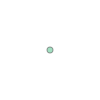

In [230]:
shapely.geometry.shape(x)

Using this principle, we can convert the entire column into a geometry column, using package `geopandas`:

In [231]:
geom = gpd.GeoSeries([shapely.geometry.shape(i) for i in dat["coordinates"]], crs=4326)
geom

0       POINT (-70.85783 42.50010)
1       POINT (-78.57028 43.05667)
2       POINT (-70.88977 42.24177)
                   ...            
1768    POINT (-71.05573 41.90565)
1769    POINT (-71.47789 41.99340)
1770    POINT (-71.03487 42.34709)
Length: 1771, dtype: geometry

and combine it with `dat` to create a layer named `pnt` with both the geometries and tweet attributes:

In [232]:
pnt = gpd.GeoDataFrame(dat, geometry=geom, crs=4326)
pnt = pnt.drop(["coordinates"], axis=1)
pnt

index                created_at                                user  \
0         1 2022-03-10 17:00:03-05:00  {'id': 2202066812, 'id_str': '2...   
1         2 2022-03-10 17:00:06-05:00  {'id': 217362857, 'id_str': '21...   
2         3 2022-03-10 17:00:07-05:00  {'id': 21799895, 'id_str': '217...   
...     ...                       ...                                 ...   
1768   1769 2022-03-11 16:59:20-05:00  {'id': 107912849, 'id_str': '10...   
1769   1770 2022-03-11 16:59:20-05:00  {'id': 114312080, 'id_str': '11...   
1770   1771 2022-03-11 16:59:25-05:00  {'id': 294758966, 'id_str': '29...   

                                    text lang                    geometry  
0          It's 5 o'clock in Marblehead.   en  POINT (-70.85783 42.50010)  
1     Wind 0 mph -. Barometer 30.10 i...   en  POINT (-78.57028 43.05667)  
2     See our latest Hingham, MA Fusi...   en  POINT (-70.88977 42.24177)  
...                                  ...  ...                         ...  
1768  See our latest #Raynham, MA Pha...   en  POINT (-71.05573 41.90565)  
1769  Help pave the path to equitable...   en  POINT (-71.47789 41.99340)  
1770  I'm at Harpoon Brewery in Bosto...   en  POINT (-71.03487 42.34709)  

[1771 rows x 6 columns]

The resulting layer `pnt` can be plotted to see the spatial pattern of tweet locations:

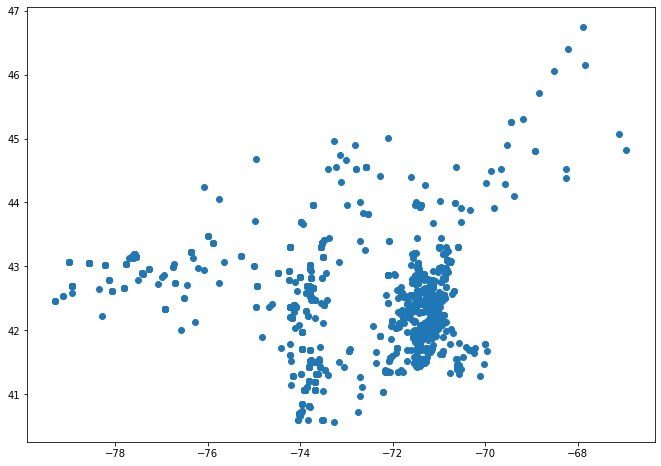

In [233]:
pnt.plot();

In [234]:
pnt.to_file("tmp.gpkg", driver="GPKG")

The bounding box which was used to collect the tweets can also be converted to a geometry:

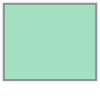

In [235]:
bb = shapely.geometry.box(-72.21437, 41.19034, -69.64939, 43.30924)
bb

Here is a plot of the bounding box and tweet locations. We can see that the Tritter API returned many tweets that are outside of the requested bounding box: 

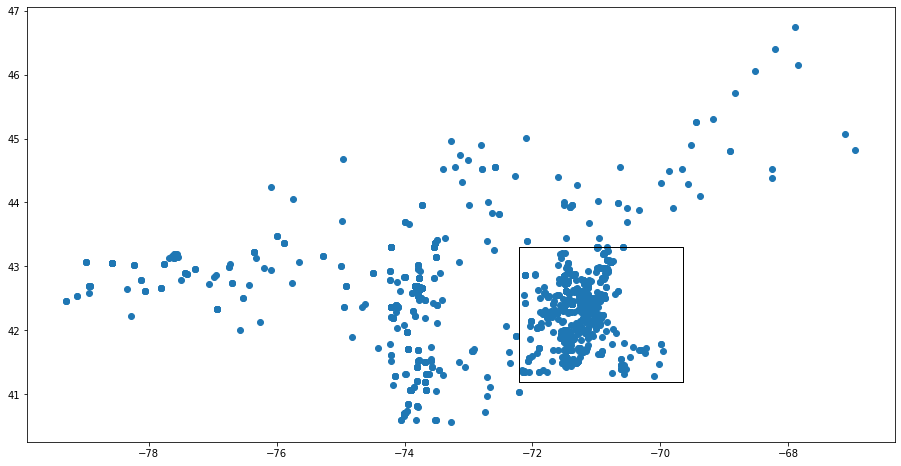

In [236]:
base = pnt.plot()
gpd.GeoSeries(bb).plot(ax=base, color="None", edgecolor="black");

We will keep just the tweets *within* the bounding box, using the `.intersects` method:

In [237]:
pnt = pnt[pnt.intersects(bb)].copy()
pnt

index                created_at                                user  \
0         1 2022-03-10 17:00:03-05:00  {'id': 2202066812, 'id_str': '2...   
2         3 2022-03-10 17:00:07-05:00  {'id': 21799895, 'id_str': '217...   
3         4 2022-03-10 17:00:09-05:00  {'id': 111986159, 'id_str': '11...   
...     ...                       ...                                 ...   
1768   1769 2022-03-11 16:59:20-05:00  {'id': 107912849, 'id_str': '10...   
1769   1770 2022-03-11 16:59:20-05:00  {'id': 114312080, 'id_str': '11...   
1770   1771 2022-03-11 16:59:25-05:00  {'id': 294758966, 'id_str': '29...   

                                    text lang                    geometry  
0          It's 5 o'clock in Marblehead.   en  POINT (-70.85783 42.50010)  
2     See our latest Hingham, MA Fusi...   en  POINT (-70.88977 42.24177)  
3     Wind 0 mph WNW. Barometer 30.07...   en  POINT (-71.50139 42.36917)  
...                                  ...  ...                         ...  
1768  See our latest #Raynham, MA Pha...   en  POINT (-71.05573 41.90565)  
1769  Help pave the path to equitable...   en  POINT (-71.47789 41.99340)  
1770  I'm at Harpoon Brewery in Bosto...   en  POINT (-71.03487 42.34709)  

[1125 rows x 6 columns]

We are left with only those tweets that fall inside the bounding box (the Boston area):

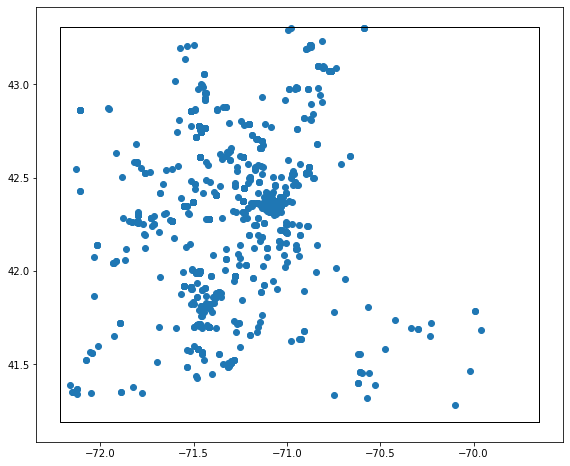

In [238]:
base = pnt.plot()
gpd.GeoSeries(bb).plot(ax=base, color="None", edgecolor="black");

We will find out which county each tweet falls in, using a country borders layer. First we read the layer, from a Shapefile:

In [239]:
borders = gpd.read_file("data/borders.shp")

The following expressions visualize the three spatial layers we now have:

* `borders`—The county borders
* `b`—The bounding box
* `pnt`—Geo-referenced Tweets

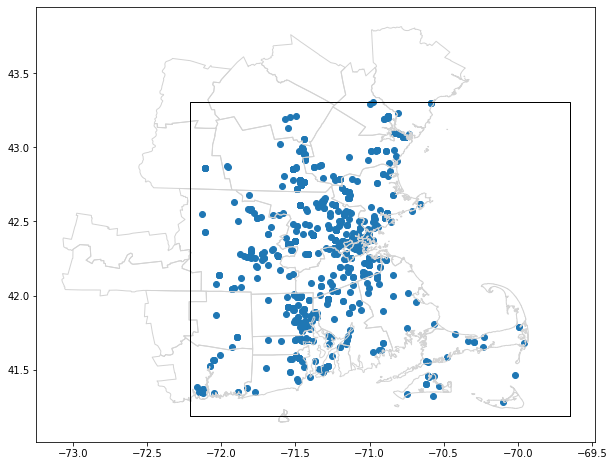

In [240]:
base = pnt.plot()
borders.plot(ax=base, color="None", edgecolor="lightgrey")
gpd.GeoSeries(bb).plot(ax=base, color="None", edgecolor="black");

The simplest temporal aggregation is omitting some of the time components, then counting occurences. For example, calculating a date+hour variable:

In [241]:
pnt["hour"] = pnt["created_at"].dt.strftime("%m-%d %H")
pnt["hour"]

0       03-10 17
2       03-10 17
3       03-10 17
          ...   
1768    03-11 16
1769    03-11 16
1770    03-11 16
Name: hour, Length: 1125, dtype: object

Then counting occurences:

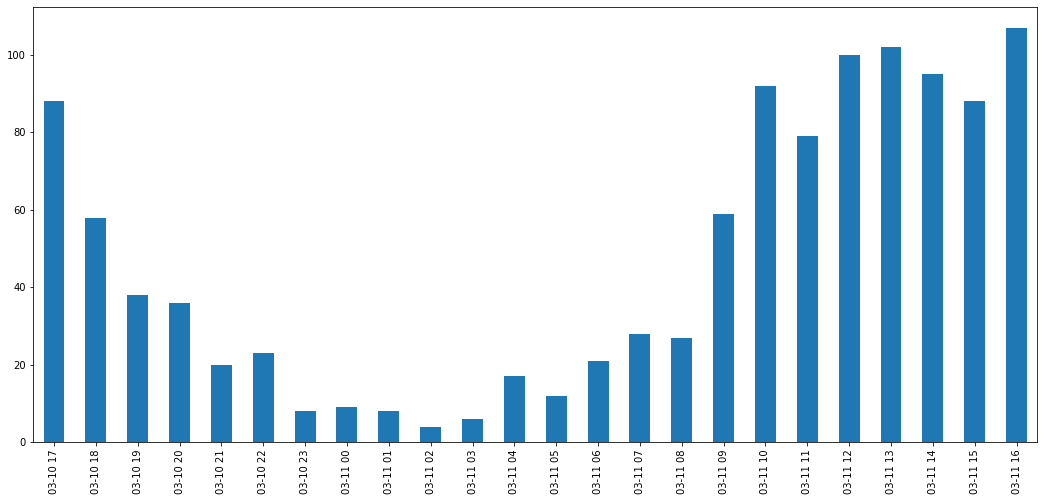

In [242]:
pnt["hour"].value_counts().sort_index().plot.bar();

For spatio-temporal aggregation we count the occurences in each unique combination of time *and* location. For example, we can do a spatial join between the tweets layer and the counties layer:

In [243]:
pnt = gpd.sjoin(pnt, borders)
pnt

index                created_at                                user  \
0         1 2022-03-10 17:00:03-05:00  {'id': 2202066812, 'id_str': '2...   
18       19 2022-03-10 17:03:37-05:00  {'id': 65386810, 'id_str': '653...   
59       60 2022-03-10 17:25:41-05:00  {'id': 188856838, 'id_str': '18...   
...     ...                       ...                                 ...   
1386   1387 2022-03-11 14:07:33-05:00  {'id': 61220731, 'id_str': '612...   
1389   1390 2022-03-11 14:09:32-05:00  {'id': 61220731, 'id_str': '612...   
1401   1402 2022-03-11 14:15:28-05:00  {'id': 61220731, 'id_str': '612...   

                                    text  ... index_right         NAME_0  \
0          It's 5 o'clock in Marblehead.  ...           7  United States   
18    Spring is in the air. 🌼 🌸 🌻 🌹 @...  ...           7  United States   
59    Want to land a job like "Delive...  ...           7  United States   
...                                  ...  ...         ...            ...   
1386  19:07 WC1N (Robert) on W1/HA-00...  ...          17  United States   
1389  19:09 WC1N (Robert) on W1/HA-00...  ...          17  United States   
1401  19:15 WC1N (Robert) on W1/HA-00...  ...          17  United States   

             NAME_1    NAME_2  
0     Massachusetts     Essex  
18    Massachusetts     Essex  
59    Massachusetts     Essex  
...             ...       ...  
1386  New Hampshire  Cheshire  
1389  New Hampshire  Cheshire  
1401  New Hampshire  Cheshire  

[1120 rows x 11 columns]

The result is a table with date+hour / county name per tweet:

In [244]:
pnt[["hour", "NAME_2"]]

hour    NAME_2
0     03-10 17     Essex
18    03-10 17     Essex
59    03-10 17     Essex
...        ...       ...
1386  03-11 14  Cheshire
1389  03-11 14  Cheshire
1401  03-11 14  Cheshire

[1120 rows x 2 columns]

Finally, we count occurences of each date+hour / county value:

In [245]:
tab = pd.crosstab(pnt["NAME_2"], pnt["hour"])
tab

hour        03-10 17  03-10 18  03-10 19  03-10 20  ...  03-11 13  03-11 14  \
NAME_2                                              ...                       
Barnstable         1         0         0         0  ...         0         0   
Bristol            1         4         2         5  ...         2         3   
Cheshire           0         0         0         0  ...         2         4   
...              ...       ...       ...       ...  ...       ...       ...   
Windham            0         0         0         0  ...         1         0   
Worcester          4         1         4         1  ...        10         5   
York               0         0         0         0  ...         2         0   

hour        03-11 15  03-11 16  
NAME_2                          
Barnstable         1         1  
Bristol            3         2  
Cheshire           0         0  
...              ...       ...  
Windham            2         0  
Worcester          2         8  
York               1         1  

[22 rows x 24 columns]

The table can be displayed as a heatmap using the `sns.heatmap` function:

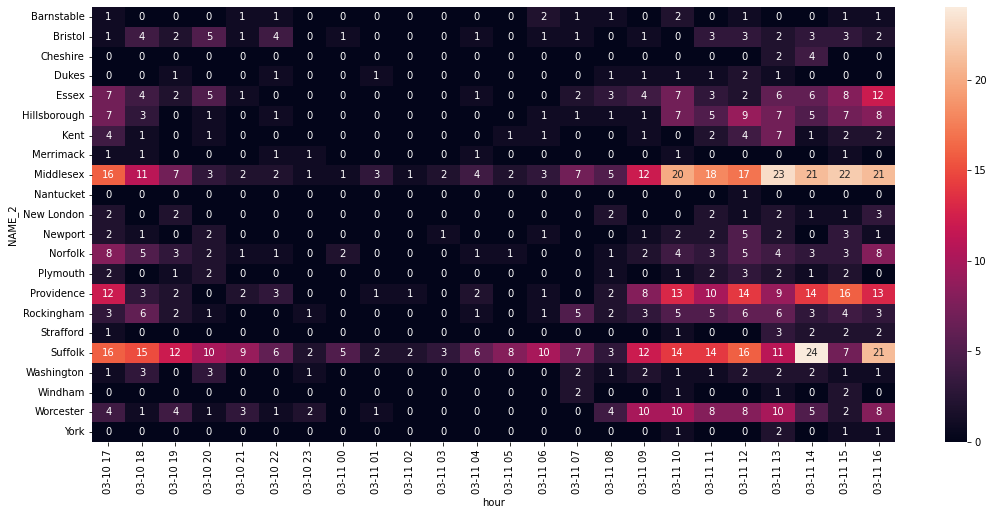

In [246]:
sns.heatmap(tab, annot=True);

Chronologically ordered observations per user represent their path in space. To create the line layer of paths, we first need to extract the user name from the `user` column, which is a `dict`: 

In [247]:
pnt["user"].iloc[0]

{'id': 2202066812,
 'id_str': '2202066812',
 'name': "5 O'Clock Somewhere",
 'screen_name': '5oclockbot',
 'location': None,
 'url': None,
 'description': "Follow us to know when it's time for a drink. @bugloaf made me.",
 'translator_type': 'none',
 'protected': False,
 'verified': False,
 'followers_count': 1929,
 'friends_count': 1,
 'listed_count': 73,
 'favourites_count': 0,
 'statuses_count': 74596,
 'created_at': 'Mon Nov 18 22:17:15 +0000 2013',
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_link_color': '1DA1F2',
 'profile_sidebar_border_color': 'C0DEED',
 'profile_sidebar_fill_color': 'DDEEF6',
 'profile_text_color': '333333',
 'prof

In [248]:
pnt["user"] = [i["screen_name"] for i in pnt["user"]]
pnt

index                created_at          user  \
0         1 2022-03-10 17:00:03-05:00    5oclockbot   
18       19 2022-03-10 17:03:37-05:00    MO_DAVINCI   
59       60 2022-03-10 17:25:41-05:00  tmj_BOS_schn   
...     ...                       ...           ...   
1386   1387 2022-03-11 14:07:33-05:00     SOTAwatch   
1389   1390 2022-03-11 14:09:32-05:00     SOTAwatch   
1401   1402 2022-03-11 14:15:28-05:00     SOTAwatch   

                                    text  ... index_right         NAME_0  \
0          It's 5 o'clock in Marblehead.  ...           7  United States   
18    Spring is in the air. 🌼 🌸 🌻 🌹 @...  ...           7  United States   
59    Want to land a job like "Delive...  ...           7  United States   
...                                  ...  ...         ...            ...   
1386  19:07 WC1N (Robert) on W1/HA-00...  ...          17  United States   
1389  19:09 WC1N (Robert) on W1/HA-00...  ...          17  United States   
1401  19:15 WC1N (Robert) on W1/HA-00...  ...          17  United States   

             NAME_1    NAME_2  
0     Massachusetts     Essex  
18    Massachusetts     Essex  
59    Massachusetts     Essex  
...             ...       ...  
1386  New Hampshire  Cheshire  
1389  New Hampshire  Cheshire  
1401  New Hampshire  Cheshire  

[1120 rows x 11 columns]

Then, we need to aggregate the point layer *by user*, collecting all points into a `list`. Importantly, the table needs to be sorted in chronological order (which we did earlier):

In [249]:
routes = pnt.groupby(["user"]).agg({"geometry": lambda x: x.tolist()}).reset_index()
routes

user                            geometry
0    2communique  [POINT (-71.52953383 42.31045902)]
1          511NY  [POINT (-71.894361 41.718893), ...
2     5oclockbot         [POINT (-70.85783 42.5001)]
..           ...                                 ...
487      yaratrv          [POINT (-71.0565 42.3577)]
488     yokomiwa     [POINT (-71.08696908 42.34674)]
489  zumescoffee         [POINT (-71.06542 42.3766)]

[490 rows x 2 columns]

Keep in mind that most content is created by few dominant users. For example, here we calculate the numper of points `n` (i.e., tweets) per unique user:

In [250]:
routes["n"] = [len(i) for i in routes["geometry"]]
routes

user                            geometry  n
0    2communique  [POINT (-71.52953383 42.31045902)]  1
1          511NY  [POINT (-71.894361 41.718893), ...  2
2     5oclockbot         [POINT (-70.85783 42.5001)]  1
..           ...                                 ... ..
487      yaratrv          [POINT (-71.0565 42.3577)]  1
488     yokomiwa     [POINT (-71.08696908 42.34674)]  1
489  zumescoffee         [POINT (-71.06542 42.3766)]  1

[490 rows x 3 columns]

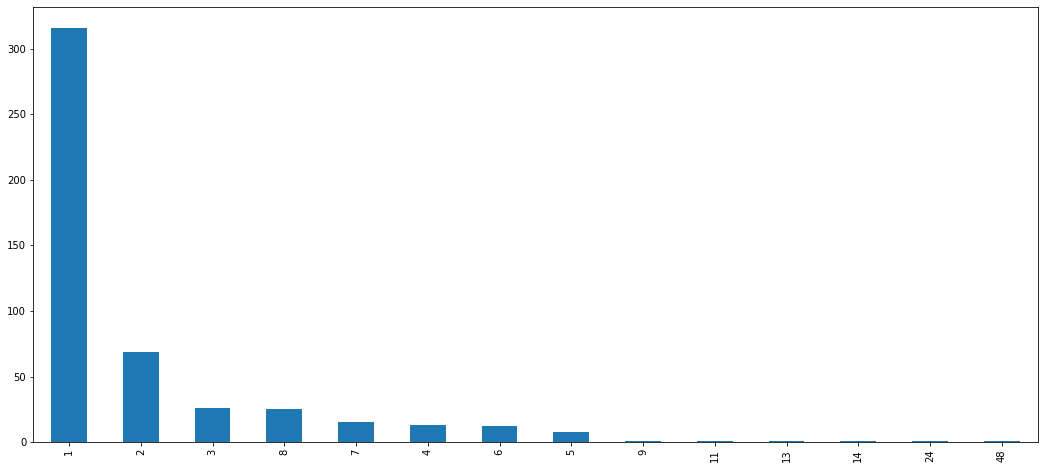

In [251]:
routes["n"].value_counts().plot(kind="bar");

At least two points are required to form a line, so we filter out users who have just one tweet:

In [252]:
routes = routes[routes["n"] > 1].reset_index(drop=True)
routes

user                            geometry  n
0            511NY  [POINT (-71.894361 41.718893), ...  2
1    ACutAboveHair  [POINT (-72.1469 41.3497), POIN...  2
2          Aescano  [POINT (-71.062258 42.325208), ...  3
..             ...                                 ... ..
171   tmj_usa_prod  [POINT (-71.4778902 41.9933953)...  2
172  true2theyanks  [POINT (-71.0565 42.3577), POIN...  2
173       yankh8tr  [POINT (-72.0166321 42.139492),...  2

[174 rows x 3 columns]

Then, we "connect" the points into `"LineString"` geometries:

In [253]:
routes["geometry"] = gpd.GeoSeries([shapely.geometry.LineString(i) for i in routes["geometry"]])
routes = gpd.GeoDataFrame(routes, crs=4326)
routes

user                            geometry  n
0            511NY  LINESTRING (-71.89436 41.71889,...  2
1    ACutAboveHair  LINESTRING (-72.14690 41.34970,...  2
2          Aescano  LINESTRING (-71.06226 42.32521,...  3
..             ...                                 ... ..
171   tmj_usa_prod  LINESTRING (-71.47789 41.99340,...  2
172  true2theyanks  LINESTRING (-71.05650 42.35770,...  2
173       yankh8tr  LINESTRING (-72.01663 42.13949,...  2

[174 rows x 3 columns]

Here is a plot of the resulting paths layer:

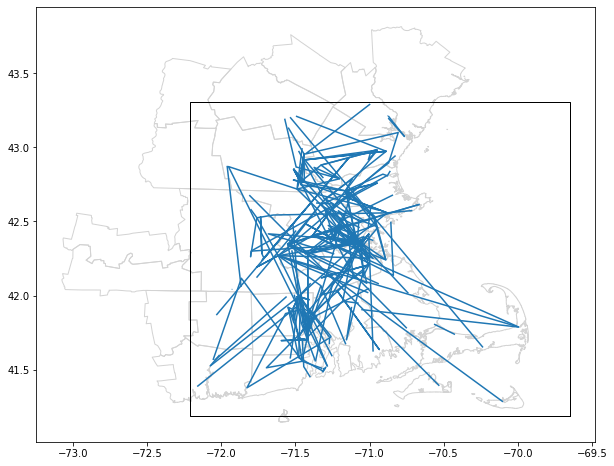

In [254]:
base = routes.plot()
borders.plot(ax=base, color="None", edgecolor="lightgrey")
gpd.GeoSeries(bb).plot(ax=base, color="None", edgecolor="black");

# LBSN research applications (1)

<figure>
    <img src="images/Yin2017.svg" width="50%">
    <figcaption>Inferred boundaries from collective Twitter user displacements in London (Yin et al. 2017)</figcaption>
</figure>

# LBSN research applications (2)

<figure>
    <img src="images/shelton_2015.png" width="60%">
    <figcaption>Unevenly segregated activity spaces of West End and East End residents in Louisville, Kentucky (Shelton et al. 2015)</figcaption>
</figure>

# LBSN research applications (3)

<figure>
    <img src="images/Chua2016.svg" width="50%">
    <figcaption>Flows derived from 3135 individuals who posted at least one tweet in Cilento (Chua et al. 2016)</figcaption>
</figure>

# Example 4: Collecting network data

Running a Python script to construct a Twitter social network

* Given starting point `s`, travelling until entire network is covered up to given depth `d`
* The script uses the `tweepy` library to access the Twitter API

```sh
python get_followers.py -s MichaelDorman84 -d 2
```

<figure>
    <img src="images/book_Python.png" width="25%">
    <figcaption>Russell (2013) Mining the Social Web</figcaption>
</figure>

<figure>
    <img src="images/python_get_followers.png" width="60%">
    <figcaption>Running the <code>get_followers.py</code> Python script for reconstructing social network of given depth around a given user</figcaption>
</figure>

The resulting folder of user-metadata processed into a CSV ile with another Python script:

```sh
python twitter_network.py
```

Finally, the processed CSV file can be read into R with `pd.read_csv`. The table consists of an edge list:

* First column is the follower
* Second column is the friend

In [255]:
friends = pd.read_csv("data/network.csv", sep = "\t", header=None, usecols=[0, 1], names=["from", "to"])
friends

from            to
0      MichaelDorman84      ireneros
1             ireneros   fdo_becerra
2             ireneros  KAUST_Vislab
...                ...           ...
86855  therealguypines     guyoseary
86856  therealguypines  RyanSeacrest
86857  therealguypines  TheEllenShow

[86858 rows x 2 columns]

# Example 5: Network analysis

We can remove users for whom we have no friend data. That way, the social network ties between the remaining users are fully described:

In [256]:
sel = friends["to"].isin(friends["from"])
friends = friends[sel].reset_index(drop=True)
friends

from              to
0     MichaelDorman84        ireneros
1            ireneros      juliasilge
2          juliasilge          jtleek
...               ...             ...
3832     NOAAResearch  NOAASatellites
3833     NOAAResearch            USGS
3834     NOAAResearch            NOAA

[3835 rows x 2 columns]

The python script also produces user details, including self-reported location:

In [257]:
locations = pd.read_csv("data/locations.csv")
locations

user                    address
0    d3visualization                   Montreal
1           sckottie                         OR
2           mdsumner           Hobart, Tasmania
..               ...                        ...
188        clavitolo    Reading, United Kingdom
189         noamross  Brooklyn/Hudson Yards, NY
190           locweb   Perth, Western Australia

[191 rows x 2 columns]

We can use a geocoding service to convert location text to coordinates. The following expression uses the free [Nominatim](https://nominatim.org/) geocoding service based on OpenStreetMap data, accessed through `geopandas`:

In [258]:
# gcp = gpd.tools.geocode(locations["address"], provider="nominatim", user_agent="michael", timeout=4)
# gcp["address"] = locations["address"]
# gcp = gcp.drop_duplicates()
# gcp.to_file("data/gcp.shp")
gcp = gpd.read_file("data/gcp.shp")
gcp

address                     geometry
0                     Montreal   POINT (-73.56981 45.50318)
1                           OR  POINT (-120.73726 43.97928)
2             Hobart, Tasmania  POINT (147.32812 -42.88251)
..                         ...                          ...
146    Reading, United Kingdom    POINT (-0.96965 51.45666)
147  Brooklyn/Hudson Yards, NY   POINT (-73.99645 40.75608)
148   Perth, Western Australia  POINT (115.86058 -31.95590)

[149 rows x 2 columns]

To get the country name for each user location, we can use the world borders polygonal layer available as a built-in dataset in `geopandas`:

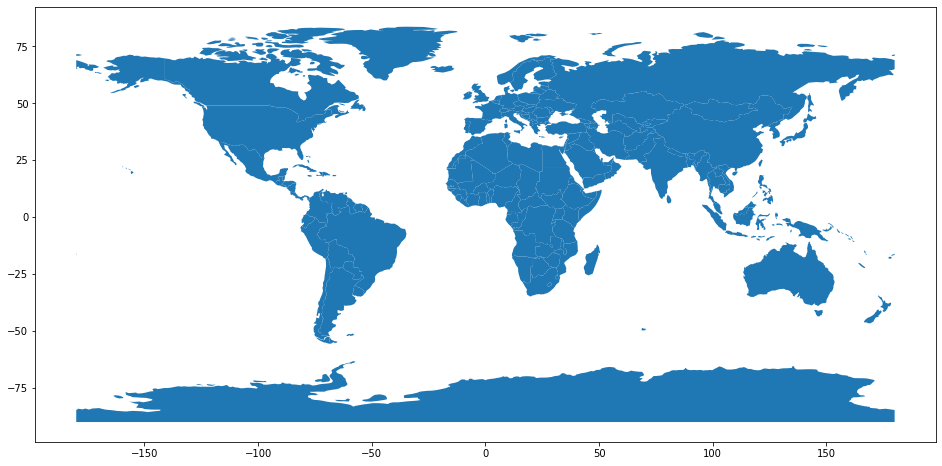

In [259]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[["name", "geometry"]]
world.plot();

Here is a map of:

* `world`—World countries
* `world.intersects(gcp.unary_union)`—World countries coinciding with Twitter user locations
* `gcp`—Geocoded Twitter user locations

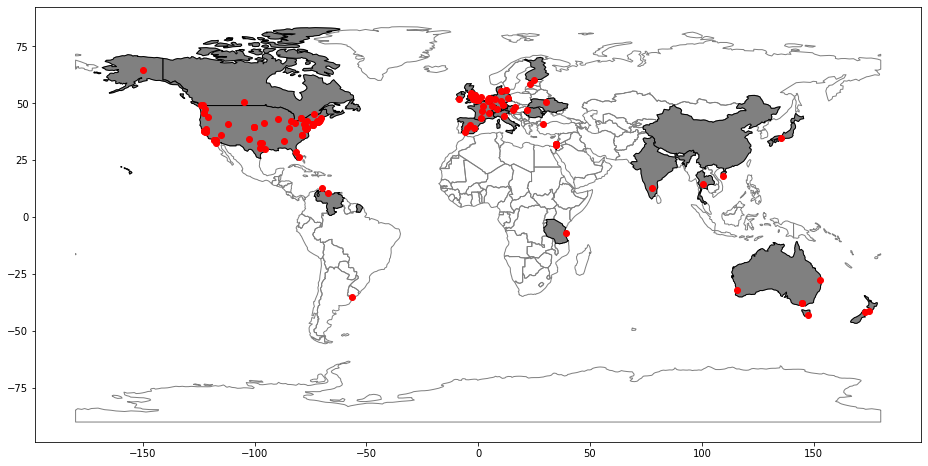

In [260]:
base = world.plot(color="None", edgecolor="grey")
world[world.intersects(gcp.unary_union)].plot(ax=base, color="grey", edgecolor="black")
gcp.plot(ax=base, color="red");

We can add the country each user location falls in with a *spatial join*. First, we use a spatial join to detect the country name where each geocoded address "falls in":

In [261]:
gcp = gpd.sjoin(gcp, world, how="left")
gcp

address                     geometry  index_right  \
0                     Montreal   POINT (-73.56981 45.50318)          3.0   
1                           OR  POINT (-120.73726 43.97928)          4.0   
2             Hobart, Tasmania  POINT (147.32812 -42.88251)        137.0   
..                         ...                          ...          ...   
146    Reading, United Kingdom    POINT (-0.96965 51.45666)        143.0   
147  Brooklyn/Hudson Yards, NY   POINT (-73.99645 40.75608)          4.0   
148   Perth, Western Australia  POINT (115.86058 -31.95590)        137.0   

                         name  
0                      Canada  
1    United States of America  
2                   Australia  
..                        ...  
146            United Kingdom  
147  United States of America  
148                 Australia  

[149 rows x 4 columns]

Then, we use an ordinary join attach those country names back to the Twitter users list. That way, in the `locations` table, we now have user+country instead of user+address:

In [262]:
locations = pd.merge(locations, gcp[["address", "name"]], how="left").drop(["address"], axis=1)
locations

user                      name
0    d3visualization                    Canada
1           sckottie  United States of America
2           mdsumner                 Australia
..               ...                       ...
188        clavitolo            United Kingdom
189         noamross  United States of America
190           locweb                 Australia

[191 rows x 2 columns]

Now we can replace all user names in the "edge list" table with the corresponding country names:

In [263]:
friends = friends.rename(columns={"from":"user"}).merge(locations, how="inner").rename(columns={"name":"from"}).drop(["user"], axis=1)
friends = friends.rename(columns={"to":"user"}).merge(locations, how="inner").rename(columns={"name":"to"}).drop(["user"], axis=1)
friends

from                        to
0                       Israel  United States of America
1     United States of America  United States of America
2               United Kingdom  United States of America
...                        ...                       ...
3832  United States of America                    Israel
3833                    Israel                    Israel
3834  United States of America                    Israel

[3835 rows x 2 columns]

Then, remove missing values:

In [264]:
friends = friends.dropna().copy()
friends

from                        to
0                       Israel  United States of America
1     United States of America  United States of America
2               United Kingdom  United States of America
...                        ...                       ...
3832  United States of America                    Israel
3833                    Israel                    Israel
3834  United States of America                    Israel

[2835 rows x 2 columns]

and count:

In [265]:
friends["count"] = 1
friends = friends.groupby(["from", "to"]).sum().reset_index()
friends

from                        to  count
0    Australia                 Australia      8
1    Australia                   Austria      5
2    Australia                   Belgium      1
..         ...                       ...    ...
261  Venezuela                  Tanzania      1
262  Venezuela                   Ukraine      1
263  Venezuela  United States of America      8

[264 rows x 3 columns]

The result is a country-to-country edge list.

To benefit from methods for visualization and analysis of networks we need to convert the edge list table to a *network object*. We use function `from_pandas_edgelist` from package `networkx`:

In [266]:
G = nx.from_pandas_edgelist(friends, "from", "to", create_using=nx.DiGraph(), edge_attr="count")
G

A network object basically contains two components:

* The **nodes**, or vertices, possibly with properties
* The **edges**, possibly with properties (such as weight) 

In our case the nodes are countries:

In [267]:
list(G.nodes)

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'France',
 'Germany',
 'Ireland',
 'Italy',
 'Netherlands',
 'New Zealand',
 'Romania',
 'Spain',
 'Switzerland',
 'Tanzania',
 'Ukraine',
 'United Kingdom',
 'United States of America',
 'Finland',
 'Japan',
 'Venezuela',
 'India',
 'Thailand',
 'Israel',
 'China']

In [54]:
len(list(G.nodes))

25

and the edges are follower ties between users of those countries, weighted according to the number of ties (`"count"`): 

In [55]:
list(G.edges.data())[:10]

[('Australia', 'Australia', {'count': 8}),
 ('Australia', 'Austria', {'count': 5}),
 ('Australia', 'Belgium', {'count': 1}),
 ('Australia', 'Canada', {'count': 6}),
 ('Australia', 'Denmark', {'count': 1}),
 ('Australia', 'France', {'count': 5}),
 ('Australia', 'Germany', {'count': 6}),
 ('Australia', 'Ireland', {'count': 1}),
 ('Australia', 'Italy', {'count': 1}),
 ('Australia', 'Netherlands', {'count': 4})]

In [56]:
len(list(G.edges))

264

The network can be visualized using function `nx.draw`. We are using one of the built-in algorithms (`.kamada_kawai_layout`) to calculate an optimal visual arrangement of the nodes:

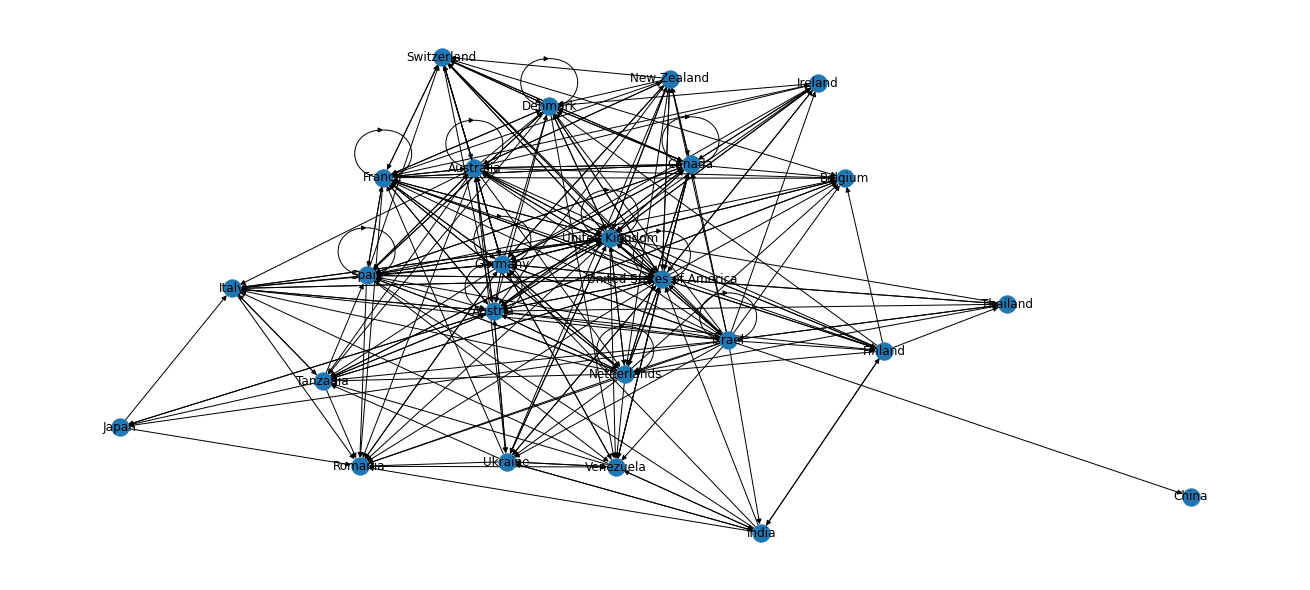

In [268]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)

To reflect the edge weights, we can use the `width` parameter of a network plot:

In [269]:
weights = nx.get_edge_attributes(G,"count").values()
weights = list(weights)
weights[:10]

[8, 5, 1, 6, 1, 5, 6, 1, 1, 4]

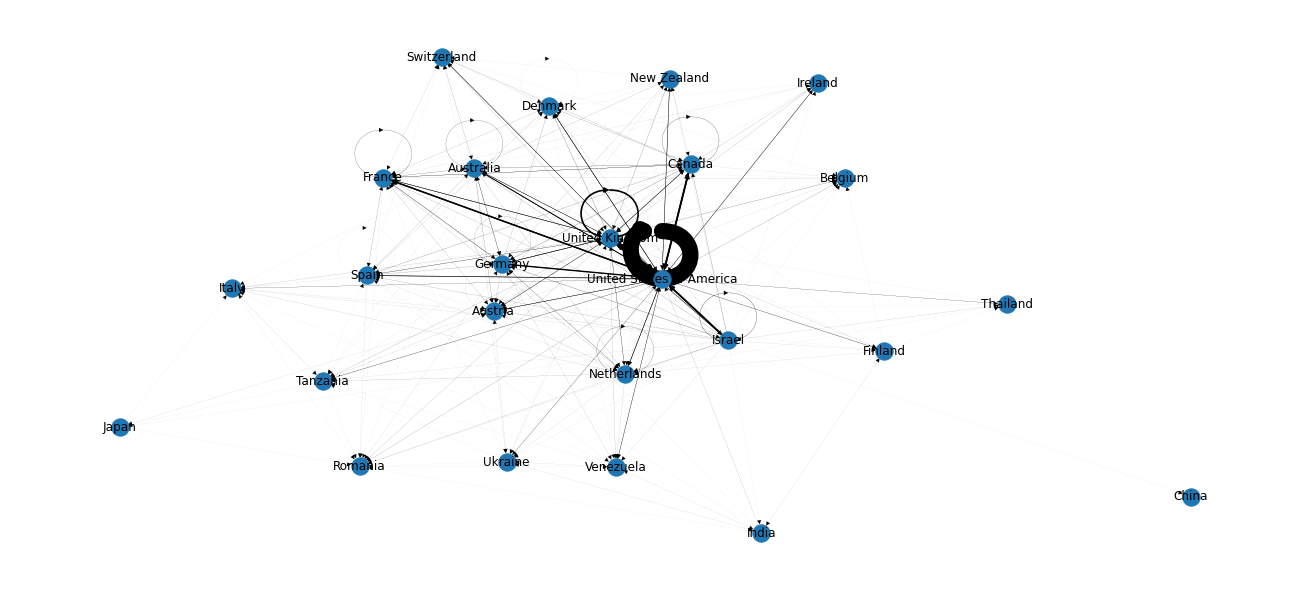

In [270]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, width=[i/50 for i in weights])

Let us calculate two basic graph properties:

* **Density** is the ratio between the number of edges and the number of possible edges
* **Number of components** is the number of sub-groups in the network

In [271]:
nx.density(G)

0.44

In [272]:
nx.number_connected_components(G.to_undirected())

1

Since `G` is a spatial network (where vertices represent locations), it may be more natural to display in a spatial layout. To do that, we first have to attach x/y coordinates to each vertex. We use the country centroids. Here is how we can get centroid coordinates of one specific country:

In [62]:
i = list(G.nodes)[0]
i

'Australia'

In [63]:
list(world[world["name"] == i]["geometry"].iloc[0].centroid.coords)

[(134.50277547536595, -25.730654779726077)]

and here is how we get all coordinates at once, into a `dict` named `pos`:

In [273]:
pos = [list(world[world["name"] == i]["geometry"].iloc[0].centroid.coords)[0] for i in list(G.nodes)]
pos = dict(zip(list(G.nodes), pos))
pos

{'Australia': (134.50277547536595, -25.730654779726077),
 'Austria': (14.076158884337072, 47.6139487927463),
 'Belgium': (4.580834113854935, 50.65244095902296),
 'Canada': (-98.14238137209708, 61.46907614534896),
 'Denmark': (9.876372937675002, 56.06393446179454),
 'France': (-2.8766966992706267, 42.46070432663372),
 'Germany': (10.288485092742851, 51.13372269040778),
 'Ireland': (-8.010236544877012, 53.18059120995006),
 'Italy': (12.140788372235871, 42.751183052964265),
 'Netherlands': (5.512217100965399, 52.298700374441786),
 'New Zealand': (172.70192594405574, -41.662578757158684),
 'Romania': (24.943252494635377, 45.857101035738005),
 'Spain': (-3.6170206023873743, 40.348656106226734),
 'Switzerland': (8.118300613385486, 46.79173768366762),
 'Tanzania': (34.75298985475595, -6.257732428506092),
 'Ukraine': (31.229122070266495, 49.14882260840351),
 'United Kingdom': (-2.8531353951805545, 53.91477348053706),
 'United States of America': (-112.5994359115045, 45.70562800215178),
 'Finla

which can be passed to `nx.draw`:

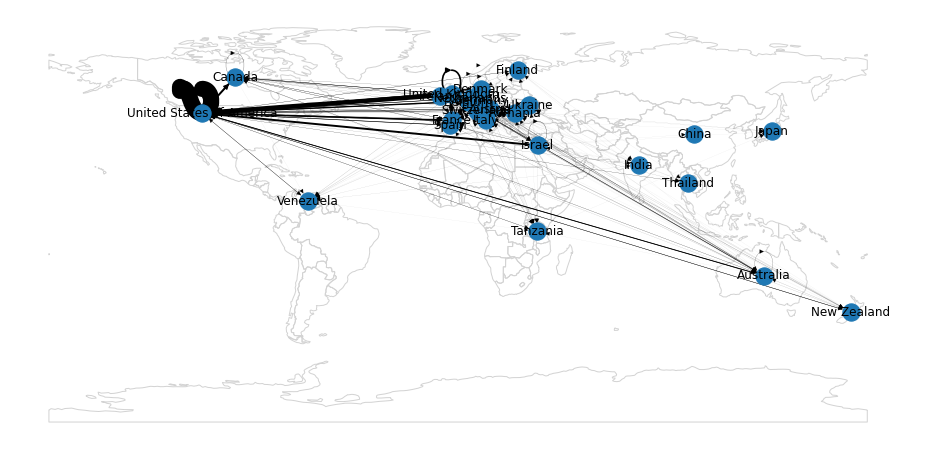

In [274]:
base = world.plot(color="None", edgecolor="lightgrey")
nx.draw(G, pos, ax=base, with_labels=True, width=[i/50 for i in weights])

Node degree is the number of edges adjacent to the node, or, in a weighted network, the sum of the edge weights for that node:

In [66]:
d = G.degree(weight="count")
d

DiDegreeView({'Australia': 180, 'Austria': 104, 'Belgium': 27, 'Canada': 294, 'Denmark': 83, 'France': 266, 'Germany': 237, 'Ireland': 39, 'Italy': 28, 'Netherlands': 125, 'New Zealand': 55, 'Romania': 26, 'Spain': 99, 'Switzerland': 52, 'Tanzania': 38, 'Ukraine': 28, 'United Kingdom': 796, 'United States of America': 2864, 'Finland': 29, 'Japan': 6, 'Venezuela': 42, 'India': 14, 'Thailand': 16, 'Israel': 221, 'China': 1})

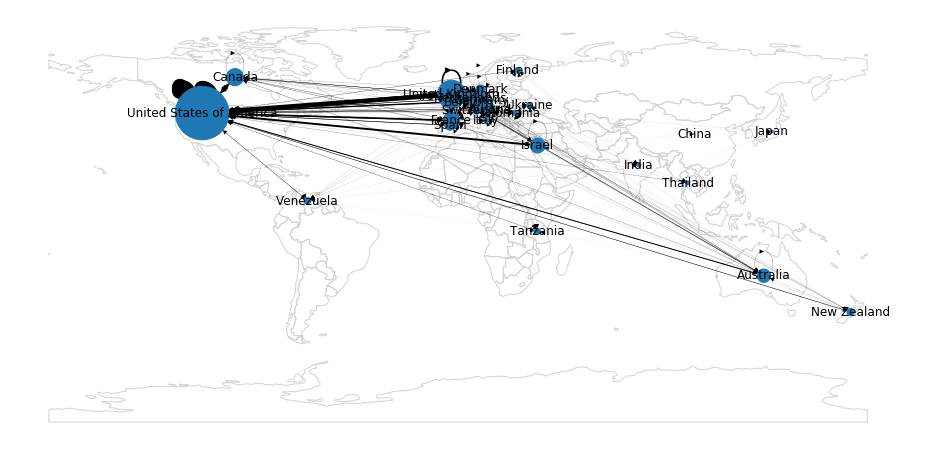

In [67]:
sizes = list(dict(d).values())
base = world.plot(color="None", edgecolor="lightgrey")
nx.draw(G, pos, ax=base, with_labels=True, width=[i/50 for i in weights], node_size=sizes)

Community detection algorithms aim at identifying sub-groups in a network. A sub-group is a set of nodes that has a relatively large number of internal ties, and also relatively few ties from the group to other parts of the network.

In [68]:
list(networkx.algorithms.community.greedy_modularity_communities(G))

[frozenset({'Australia',
            'Canada',
            'Denmark',
            'France',
            'Germany',
            'Ireland',
            'New Zealand',
            'Spain',
            'Switzerland',
            'United Kingdom'}),
 frozenset({'China',
            'Finland',
            'India',
            'Israel',
            'Thailand',
            'Ukraine',
            'United States of America',
            'Venezuela'}),
 frozenset({'Austria',
            'Belgium',
            'Italy',
            'Japan',
            'Netherlands',
            'Romania',
            'Tanzania'})]

# LBSN research applications (4)

<figure>
    <img src="images/Takhteyev2012.svg" width="70%">
    <figcaption>Histogram of physical distances between connected users (Takhteyev et al. 2012)</figcaption>
</figure>

# LBSN research applications (5)

<figure>
    <img src="images/Eleta2014.svg" width="50%">
    <figcaption>Examples ot five multilingual Twitter user network types, where English is integrated with (1) French, (2) Japanese, (3) Portuguese, (4) Greek and (5) Arabic Eleta & Golbeck 2014</figcaption>
</figure>

# Example 6: Sentiment analysis

* Sentiment analysis quantifies subjective information from text.
* The most commonly used methods are based on dictionaries of positive and negative words
* For example, here is how we can calculate the polarity (i.e., positive/negative sentiment) of texts using package `textblob`:

In [69]:
text = [
    "I'm happy", 
    "I'm sad...",
    "I'm very happy!", 
    "I'm not happy"
]

In [70]:
[(i, textblob.TextBlob(i).sentiment.polarity) for i in text]

[("I'm happy", 0.8),
 ("I'm sad...", -0.5),
 ("I'm very happy!", 1.0),
 ("I'm not happy", -0.4)]

Before calculating polarity of the tweets sample, we need to keep only those in English:

In [71]:
pnt1 = pnt[pnt["lang"] == "en"].copy()
pnt1

index                created_at           user  \
0         1 2022-03-10 17:00:03-05:00     5oclockbot   
18       19 2022-03-10 17:03:37-05:00     MO_DAVINCI   
59       60 2022-03-10 17:25:41-05:00   tmj_BOS_schn   
...     ...                       ...            ...   
1672   1673 2022-03-11 16:19:24-05:00  SperryCareers   
1107   1108 2022-03-11 12:15:28-05:00  tmj_MA_transp   
1386   1387 2022-03-11 14:07:33-05:00      SOTAwatch   

                                    text  ... index_right         NAME_0  \
0          It's 5 o'clock in Marblehead.  ...           7  United States   
18    Spring is in the air. 🌼 🌸 🌻 🌹 @...  ...           7  United States   
59    Want to land a job like "Delive...  ...           7  United States   
...                                  ...  ...         ...            ...   
1672  We're hiring! Click to apply: S...  ...           3  United States   
1107  Want to work at FedEx Express? ...  ...          11  United States   
1386  19:07 WC1N (Robert) on W1/HA-00...  ...          17  United States   

             NAME_1     NAME_2  
0     Massachusetts      Essex  
18    Massachusetts      Essex  
59    Massachusetts      Essex  
...             ...        ...  
1672          Maine       York  
1107  Massachusetts  Nantucket  
1386  New Hampshire   Cheshire  

[1094 rows x 11 columns]

Then we can calculate polarity and place it in a new `polarity` column:

In [72]:
pnt1["polarity"] = [textblob.TextBlob(i).sentiment.polarity for i in pnt1["text"]]
pnt1

index                created_at           user  \
0         1 2022-03-10 17:00:03-05:00     5oclockbot   
18       19 2022-03-10 17:03:37-05:00     MO_DAVINCI   
59       60 2022-03-10 17:25:41-05:00   tmj_BOS_schn   
...     ...                       ...            ...   
1672   1673 2022-03-11 16:19:24-05:00  SperryCareers   
1107   1108 2022-03-11 12:15:28-05:00  tmj_MA_transp   
1386   1387 2022-03-11 14:07:33-05:00      SOTAwatch   

                                    text  ...         NAME_0         NAME_1  \
0          It's 5 o'clock in Marblehead.  ...  United States  Massachusetts   
18    Spring is in the air. 🌼 🌸 🌻 🌹 @...  ...  United States  Massachusetts   
59    Want to land a job like "Delive...  ...  United States  Massachusetts   
...                                  ...  ...            ...            ...   
1672  We're hiring! Click to apply: S...  ...  United States          Maine   
1107  Want to work at FedEx Express? ...  ...  United States  Massachusetts   
1386  19:07 WC1N (Robert) on W1/HA-00...  ...  United States  New Hampshire   

         NAME_2  polarity  
0         Essex      0.00  
18        Essex      0.00  
59        Essex      0.00  
...         ...       ...  
1672       York      0.00  
1107  Nantucket      0.00  
1386   Cheshire     -0.75  

[1094 rows x 12 columns]

Here are the five most *negative* tweets:

In [73]:
pnt1[["text", "polarity"]].sort_values(by="polarity").head()["text"].tolist()

['19:07 WC1N (Robert) on W1/HA-009 (Monadnock Mountain, 967m, 4 pts) 14.0590 CW: [RBNHole] at KM3T 18 WPM 3 dB SNR [RBNHOLE]',
 'Tobias Harris has the worst contract in the league. God damn he sucks.',
 'Random #bunkerhill timelapse clip of the day! #charlestown #boston @bostonNHP https://t.co/qf3n1NGtW7',
 'Random #southie timelapse clip of the day! #boston #dorchesterheights @bostonNHP https://t.co/uxOnUU7QZW',
 'Just posted a photo @ Cold Harbor Brewing Company https://t.co/kf7QG5cOsi']

and the five most *positive* tweets:

In [74]:
pnt1[["text", "polarity"]].sort_values(by="polarity", ascending=False).head()["text"].tolist()

['The great Max Jordan turns 18 today!\nMiraculous! @ Providence, Rhode Island https://t.co/p2DXNrRKDU',
 'Career tip for landing jobs like "Sanitation" in #Braintree, MA. Go on informational interviews. The best way to ge… https://t.co/XPqLodsb7B',
 'Excellent flavor. - Drinking a Letter To Robert Fripp by @CamBrewingCo at @cambridgebrewer  — https://t.co/tR4VtNBBHg',
 'At Hawthorn Senior Living we care about people and because our residents deserve the best. If you are someone who u… https://t.co/XUxU1vfI9H',
 'Our delicious FIsh Stew tonight. #fishstew #fishfriday #fishandchips #bakedschrod #grilledsalmon  #allovernewton… https://t.co/wMDs5Nz2x1']

We can also examine the spatial pattern of tweet polarity using a map:

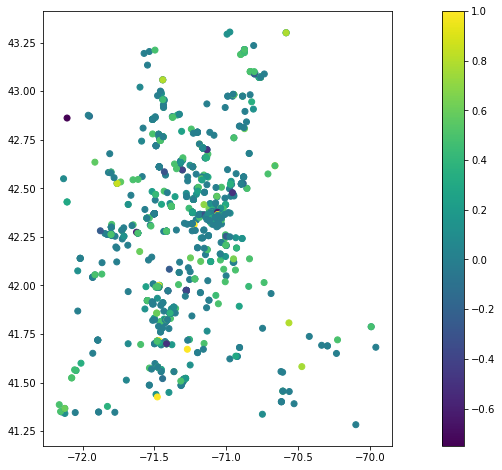

In [75]:
pnt1.plot(column="polarity", legend=True);

# LBSN research applications (6)

<figure>
    <img src="images/Mitchell2013.svg" width="50%">
    <figcaption>Spearman correlations for 432 demographic attributes with happiness (Mitchell et al. 2013)</figcaption>
</figure>

# LBSN research applications (7)

<figure>
    <img src="images/Margolin2014.svg" width="70%">
    <figcaption>Sentiment indices over time in (a) the direct affected region (DAR) and (b) the City of Boston (Lin & Margolin 2014)</figcaption>
</figure>

## Summary—Software Tools

* Data collection
    * `twarc`
    * `tweepy`
* Spatial analysis
    * `shapely`
    * `geopandas`
* Network analysis
    * `networkx`
* Sentiment Analysis
    * `textblob`

Thank you for listening!
=====